In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [99]:
# Load the dataset
dataset_path = 'dataset.csv'
df = pd.read_csv(dataset_path)
df

,Unnamed: 0,age,height,job,city,favorite music style
0,0,30.237071,179.874298,designer,paris,trap
1,1,27.915796,172.659587,fireman,marseille,hiphop
2,2,32.205338,181.337491,teacher,paris,metal
3,3,26.595215,172.337885,designer,toulouse,metal
4,4,27.394780,182.708030,teacher,paris,metal
...,...,...,...,...,...,...
195,195,38.768667,169.293654,developper,madrid,classical
196,196,32.041409,176.971060,designer,lille,hiphop
197,197,29.015181,172.990379,developper,paris,classical
198,198,28.889681,172.776664,painter,toulouse,rap


In [100]:
def calculate_dissimilarity(sample1, sample2):
    # Initialize dissimilarity
    dissimilarity = 0
    
    # Calculate numerical dissimilarity (e.g., age and height)
    age_diff = abs(sample1["age"] - sample2["age"])
    height_diff = abs(sample1["height"] - sample2["height"])
    
    # Normalize the differences by the maximum possible difference
    age_diff_normalized = age_diff / 100
    height_diff_normalized = height_diff / 250
    
    # Add to dissimilarity with weights (assuming age is twice as important as height)
    dissimilarity += age_diff_normalized * 2
    dissimilarity += height_diff_normalized
    
    # Calculate categorical dissimilarity (e.g., job, city, favorite music style)
    job_diff = 1 if sample1["job"] != sample2["job"] else 0
    city_diff = 1 if sample1["city"] != sample2["city"] else 0
    music_diff = 1 if sample1["favorite music style"] != sample2["favorite music style"] else 0

    
    # Add to dissimilarity with weights (assuming job and city are equally important, music style is less important)
    dissimilarity += job_diff * 1
    dissimilarity += city_diff * 1
    dissimilarity += music_diff * 0.5

    # Print the dissimilarity
    print(f"Dissimilarity between {sample1[0]} and {sample2[0]}: {dissimilarity}")
    
    return dissimilarity

/var/folders/wb/cgddl6zd1wq9rl4xqmq9bjhc0000gn/T/ipykernel_68137/1316849518.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Dissimilarity between {sample1[0]} and {sample2[0]}: {dissimilarity}")


Dissimilarity between 0 and 0: 0.0
Dissimilarity between 0 and 1: 2.5752843533953116
Dissimilarity between 0 and 2: 1.5452181124603341
Dissimilarity between 0 and 3: 1.602982781267049
Dissimilarity between 0 and 4: 1.5681807578143865
Dissimilarity between 0 and 5: 2.52188939532137
Dissimilarity between 0 and 6: 2.7654572826969748
Dissimilarity between 0 and 7: 2.64765724013096
Dissimilarity between 0 and 8: 1.5857628493739058
Dissimilarity between 0 and 9: 1.0503502247454135
Dissimilarity between 0 and 10: 1.6086732117728861
Dissimilarity between 0 and 11: 1.5635217184269024
Dissimilarity between 0 and 12: 2.1016142377911775
Dissimilarity between 0 and 13: 1.5418778483890467
Dissimilarity between 0 and 14: 1.578387125049122
Dissimilarity between 0 and 15: 2.6082077497841203
Dissimilarity between 0 and 16: 2.680422482475321
Dissimilarity between 0 and 17: 2.1608364843478727
Dissimilarity between 0 and 18: 2.1911916448347277
Dissimilarity between 0 and 19: 2.1253197414474023
Dissimilarit

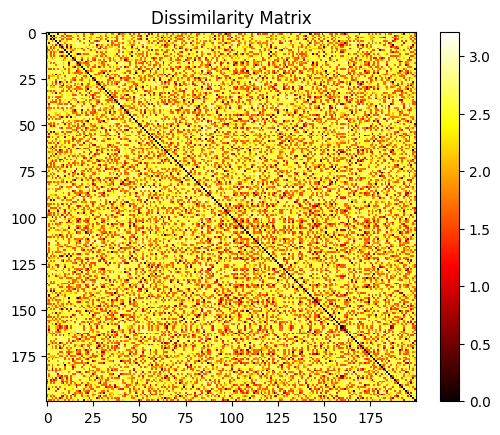

In [101]:
# Compute the dissimilarity matrix
dissimilarity_matrix = np.zeros((len(df.index), len(df.index)))
for i in range(len(df.index)):
    for j in range(len(df.index)):
        dissimilarity_matrix[i, j] = calculate_dissimilarity(df.loc[i], df.loc[j])

# Display the dissimilarity matrix in a graph
plt.imshow(dissimilarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Dissimilarity Matrix')
plt.show()

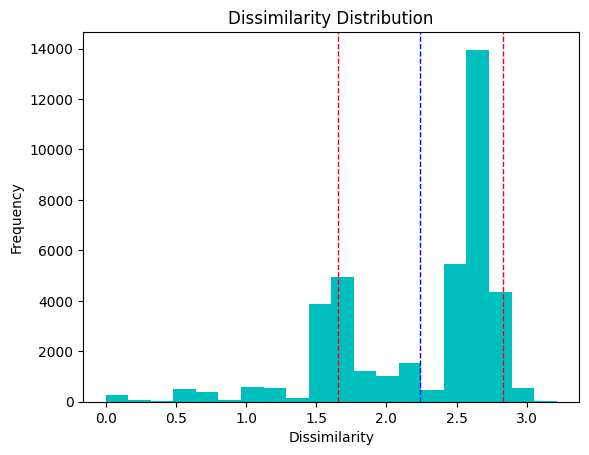

In [102]:
# Calculate mean and standard deviation of the dissimilarity distribution
mean_dissimilarity = np.mean(dissimilarity_matrix)
std_dissimilarity = np.std(dissimilarity_matrix)

# Show them in a graph
plt.hist(dissimilarity_matrix.flatten(), bins=20, color='c')
plt.axvline(mean_dissimilarity, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean_dissimilarity + std_dissimilarity, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_dissimilarity - std_dissimilarity, color='r', linestyle='dashed', linewidth=1)
plt.title('Dissimilarity Distribution')
plt.xlabel('Dissimilarity')
plt.ylabel('Frequency')
plt.show()

In [103]:
# Save the dissimilarity matrix to a file
np.save('dissimilarity_matrix.npy', dissimilarity_matrix)